In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/SONY.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,2019-03-01,47.89,47.8200,48.060,47.6900
1,2019-03-02,47.89,47.8200,48.060,47.6900
2,2019-03-03,47.89,47.8200,48.060,47.6900
3,2019-03-04,47.62,47.7800,47.870,47.2300
4,2019-03-05,47.66,47.7500,47.900,47.5300
...,...,...,...,...,...
1915,2024-05-28,79.86,80.7500,80.770,79.7700
1916,2024-05-29,78.45,78.9900,79.370,78.3400
1917,2024-05-30,80.79,80.4800,81.260,80.1500
1918,2024-05-31,82.34,81.7500,82.380,81.4700


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.5301227483352027
Mean Squared Error (MSE): 0.516853493680694
R-squared (R2): 0.9902923173482674


**Dự đoán 30 ngày tiếp theo**

In [6]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

85.748924
4
1 day input [85.0025     83.615      85.74892426]
1 day output [83.06292]
2 day input [83.615      85.74892426 83.06291962]
2 day output [83.86836]
3 day input [85.74892426 83.06291962 83.86836243]
3 day output [83.06292]
4 day input [83.06291962 83.86836243 83.06291962]
4 day output [83.376625]
5 day input [83.86836243 83.06291962 83.37662506]
5 day output [83.06292]
6 day input [83.06291962 83.37662506 83.06291962]
6 day output [83.13164]
7 day input [83.37662506 83.06291962 83.13163757]
7 day output [83.13164]
8 day input [83.06291962 83.13163757 83.13163757]
8 day output [83.13164]
9 day input [83.13163757 83.13163757 83.13163757]
9 day output [83.13164]
10 day input [83.13163757 83.13163757 83.13163757]
10 day output [83.13164]
11 day input [83.13163757 83.13163757 83.13163757]
11 day output [83.13164]
12 day input [83.13163757 83.13163757 83.13163757]
12 day output [83.13164]
13 day input [83.13163757 83.13163757 83.13163757]
13 day output [83.13164]
14 day input [83.

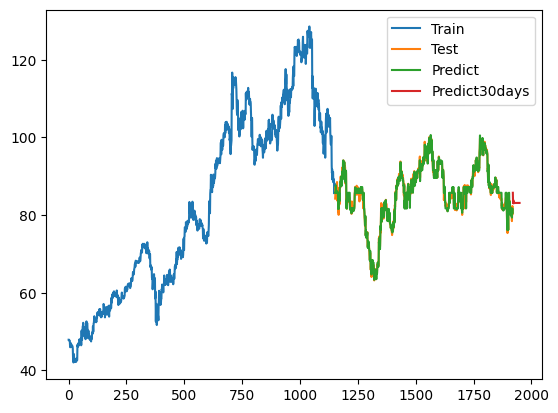

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

85.748924
4
1 day input [84.085  85.0025 83.615 ]
1 day output [85.748924]
2 day input [85.0025     83.615      85.74892426]
2 day output [83.06292]
3 day input [83.615      85.74892426 85.74892426]
3 day output [83.86836]
4 day input [85.74892426 85.74892426 83.06291962]
4 day output [85.748924]
5 day input [85.74892426 83.06291962 83.86836243]
5 day output [83.06292]
6 day input [83.06291962 83.86836243 85.74892426]
6 day output [83.376625]
7 day input [83.86836243 85.74892426 83.06291962]
7 day output [85.748924]
8 day input [85.74892426 83.06291962 83.37662506]
8 day output [83.06292]
9 day input [83.06291962 83.37662506 85.74892426]
9 day output [83.13164]
10 day input [83.37662506 85.74892426 83.06291962]
10 day output [83.86836]
11 day input [85.74892426 83.06291962 83.13163757]
11 day output [83.06292]
12 day input [83.06291962 83.13163757 83.86836243]
12 day output [83.13164]
13 day input [83.13163757 83.86836243 83.06291962]
13 day output [83.376625]
14 day input [83.86836243

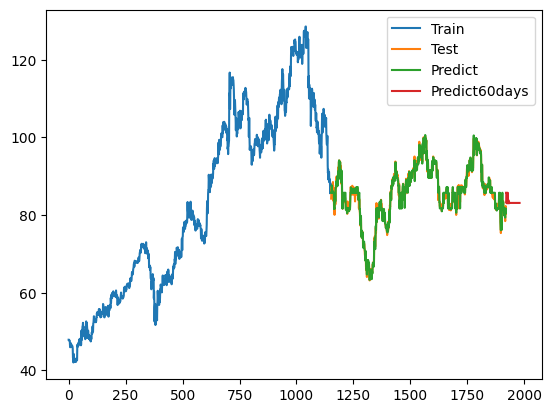

In [9]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [10]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

85.748924
4
1 day input [85.0025     83.615      85.74892426]
1 day output [83.06292]
2 day input [83.615      85.74892426 83.06291962]
2 day output [83.86836]
3 day input [85.74892426 83.06291962 83.86836243]
3 day output [83.06292]
4 day input [83.06291962 83.86836243 83.06291962]
4 day output [83.376625]
5 day input [83.86836243 83.06291962 83.37662506]
5 day output [83.06292]
6 day input [83.06291962 83.37662506 83.06291962]
6 day output [83.13164]
7 day input [83.37662506 83.06291962 83.13163757]
7 day output [83.13164]
8 day input [83.06291962 83.13163757 83.13163757]
8 day output [83.13164]
9 day input [83.13163757 83.13163757 83.13163757]
9 day output [83.13164]
10 day input [83.13163757 83.13163757 83.13163757]
10 day output [83.13164]
11 day input [83.13163757 83.13163757 83.13163757]
11 day output [83.13164]
12 day input [83.13163757 83.13163757 83.13163757]
12 day output [83.13164]
13 day input [83.13163757 83.13163757 83.13163757]
13 day output [83.13164]
14 day input [83.

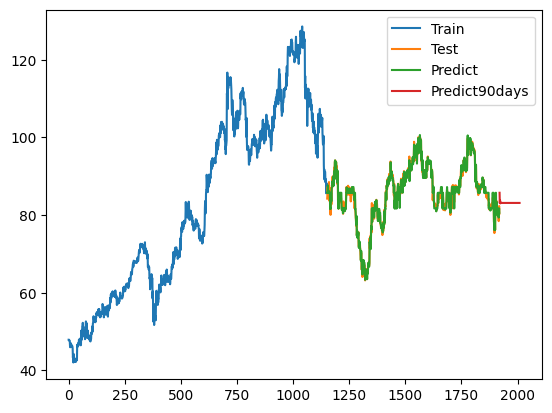

In [11]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()